
# Final Project: Classification #  
**Adam Elias**  

## Standard Imports

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [143]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer

# Imports for Performance Measures

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [146]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [147]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1: Logistic Regression

### Reading the Data

In [148]:
#Using the separator parameter because this data is separated by semicolons
df = pd.read_csv('/content/gdrive/MyDrive/CS430/fatal-police-shootings-data.csv')

### Statistical and Visual Exploration

In [149]:
df.sample(30)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
4144,4580,Kenneth Cherry,2019-03-18,shot and Tasered,sharp object,36.0,M,W,Mansfield,OH,False,other,Not fleeing,False,-82.536,40.711,True
5218,5681,Thomas A. Powell,2020-04-14,shot,gun,31.0,M,W,Old Town,ME,False,attack,Not fleeing,False,NaN,NaN,True
3711,4157,Phillip Samuel Moskios,2018-10-05,shot,gun,48.0,M,W,Klamath Falls,OR,False,attack,Foot,False,-121.919,42.518,True
1318,1499,Lee Easter,2016-04-28,shot,gun,53.0,M,W,Boise,ID,True,attack,Not fleeing,True,-116.316,43.553,True
2075,2315,Juan Salinas,2017-02-09,shot and Tasered,knife,33.0,M,H,Lake Stevens,WA,True,other,Not fleeing,False,-122.088,47.979,True
7710,8615,Vance Ledeau,2022-08-27,shot,undetermined,34.0,M,N,Missoula,MT,False,undetermined,NaN,False,-114.092,46.927,True
904,1044,Darius Smith,2015-11-30,shot,gun,18.0,M,B,Atlanta,GA,False,attack,Foot,False,-84.387,33.779,True
1627,1816,Donta Taylor,2016-08-25,shot,gun,31.0,M,B,Compton,CA,False,attack,Foot,False,-118.240,33.899,True
6224,6759,Silas Zacharia Lambert,2021-04-05,shot and Tasered,gun,25.0,M,NaN,Anadarko,OK,False,attack,NaN,True,-98.246,35.081,True
6151,6724,Angel B. Degollado,2021-03-14,shot,undetermined,21.0,M,H,Laredo,TX,True,undetermined,NaN,False,NaN,NaN,True


In [150]:
df.drop(columns=['id', 'name', 'city', 'longitude', 'latitude', 'is_geocoding_exact'], inplace=True)

In [151]:
df.head()

,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False


In [152]:
df.tail()

,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
7997,2022-11-30,shot,vehicle,NaN,M,NaN,AZ,False,attack,NaN,False
7998,2022-11-30,shot,knife,NaN,M,NaN,CA,False,other,NaN,False
7999,2022-12-01,shot,gun,38.0,M,NaN,CA,False,attack,NaN,False
8000,2022-12-01,shot,gun,NaN,M,NaN,KS,False,other,NaN,False
8001,2022-12-01,shot,knife,NaN,M,NaN,FL,False,attack,NaN,False


In [153]:
manner_of_death = df['manner_of_death'].groupby(df['manner_of_death']).count()

In [154]:
manner_of_death

manner_of_death
shot                7664
shot and Tasered     338
Name: manner_of_death, dtype: int64

In [155]:
armed = df['armed'].groupby(df['armed']).count()

In [156]:
armed

armed
Airsoft pistol          6
BB gun                 19
BB gun and vehicle      1
Gun                     5
Taser                  39
                       ..
vehicle and gun        10
vehicle and machete     1
walking stick           1
wasp spray              1
wrench                  1
Name: armed, Length: 106, dtype: int64

In [157]:
gun_count = df['armed'].str.contains('gun', case=False, na=False).sum()
print("Number of times 'gun' appears: ", gun_count)

Number of times 'gun' appears:  4695


In [158]:
vehicle_count = df['armed'].str.contains('vehicle', case=False, na=False).sum()
print("Number of times 'vehicle' appears: ", vehicle_count)

Number of times 'vehicle' appears:  325


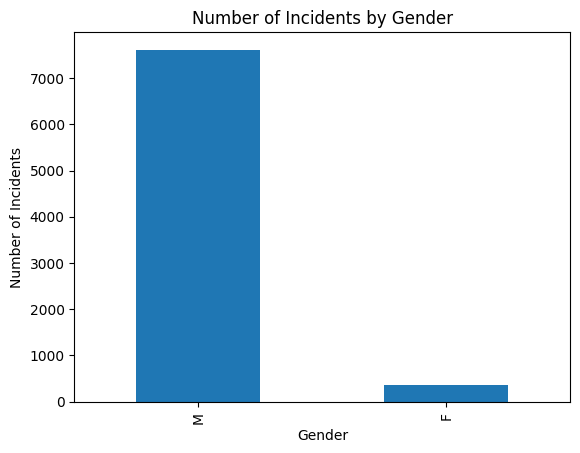

In [159]:
gender_counts = df['gender'].value_counts()

gender_counts.plot(kind='bar')

plt.title('Number of Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Incidents')

plt.show()

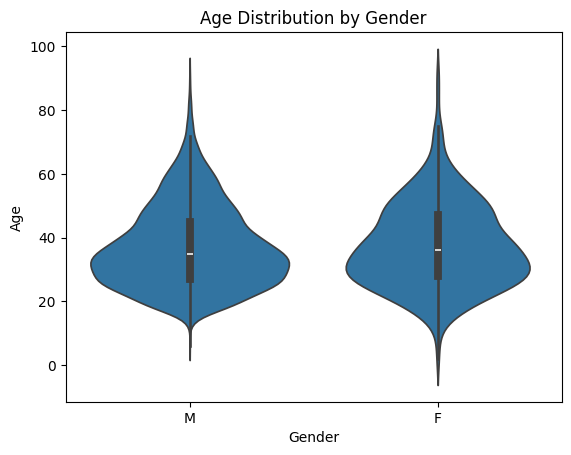

In [160]:
sns.violinplot(x='gender', y='age', data=df)

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

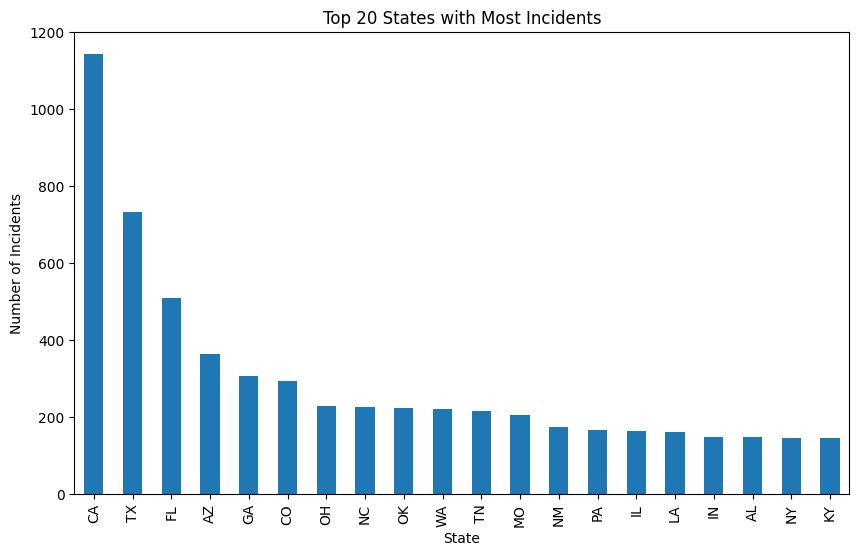

In [161]:
state_counts = df['state'].value_counts()

top_n = state_counts.head(20)

top_n.plot(kind='bar', figsize=(10,6))

plt.title('Top 20 States with Most Incidents')
plt.xlabel('State')
plt.ylabel('Number of Incidents')

plt.show()

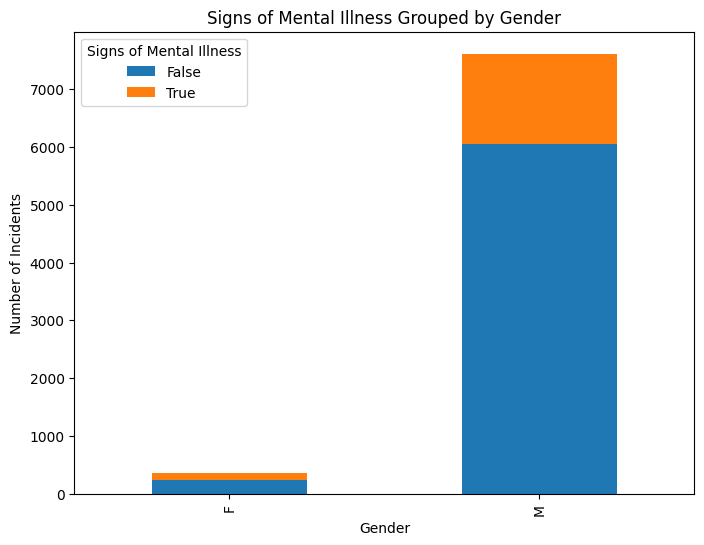

In [162]:
mental_illness_counts = df.groupby(['gender', 'signs_of_mental_illness']).size().unstack()

mental_illness_counts.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title('Signs of Mental Illness Grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Incidents')

plt.legend(title='Signs of Mental Illness')

plt.show()

### Splitting Data into Train/Test

In [163]:
#Check for missing values in X_train
missing_values = X_train.isnull().sum()
print(missing_values)

age         0
race_B      0
race_H      0
race_N      0
race_O      0
race_W      0
gender_M    0
dtype: int64


In [164]:
#Cleaning up the data

#Drop NaN values
df = df.dropna(subset=['flee'])

imputer = SimpleImputer(strategy='median')

df['age'] = imputer.fit_transform(df[['age']])

#Change to binary the fleeing/not fleeing datapoint.
df['flee_binary'] = df['flee'].apply(lambda x: 0 if x== 'Not fleeing' else 1)

<ipython-input-164-0a4af4902ebe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = imputer.fit_transform(df[['age']])
<ipython-input-164-0a4af4902ebe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flee_binary'] = df['flee'].apply(lambda x: 0 if x== 'Not fleeing' else 1)


In [165]:
df.flee_binary.groupby(df.flee_binary).count()

flee_binary
0    4430
1    2606
Name: flee_binary, dtype: int64

In [166]:
#One-hot encode categorical variables.  Use the pandas get_dummies method.
df_encoded = pd.get_dummies(df, columns=['race', 'gender'], drop_first=True)

In [167]:
X = df_encoded[['age'] + [col for col in df_encoded.columns if col.startswith('race_') or col.startswith('gender_')]]
y = df_encoded['flee_binary']

In [168]:
#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=32)

### Building the Pipeline

In [169]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [170]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

### Executing the Model

In [171]:
#Fit the model to the training data
pipeline.fit(X_train, y_train)

#Predict on the test data
y_pred = pipeline.predict(X_test)

### Evaluating Model

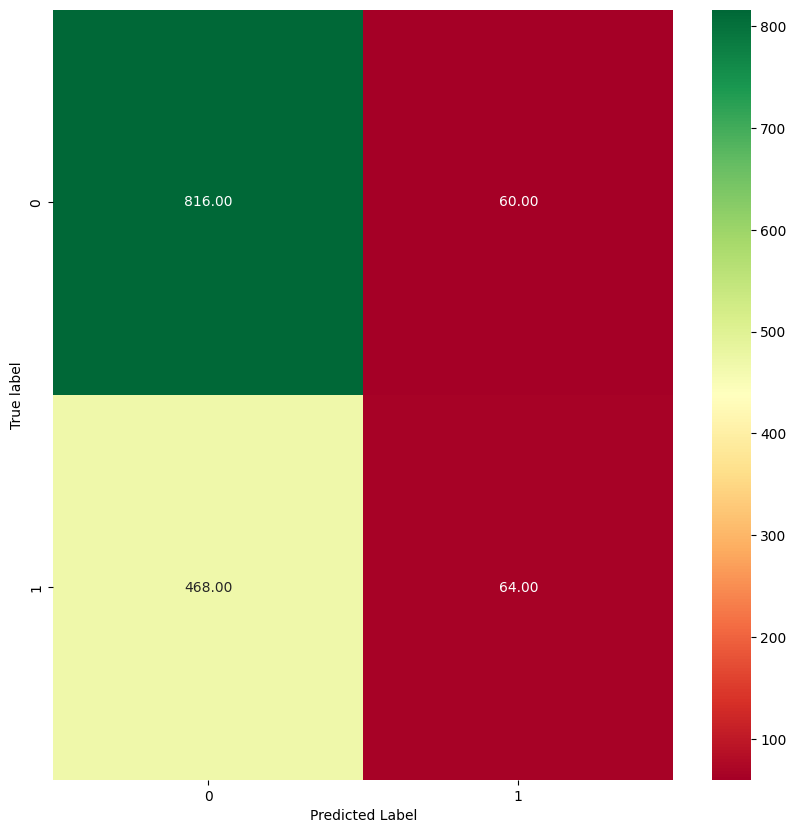

In [172]:
y_pred = pipeline.predict(X_test)

plot_cm(y_test,y_pred)

In [173]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Precision:  0.5161290322580645
Recall:  0.12030075187969924
F1 Score:  0.1951219512195122


0.6024264428193772


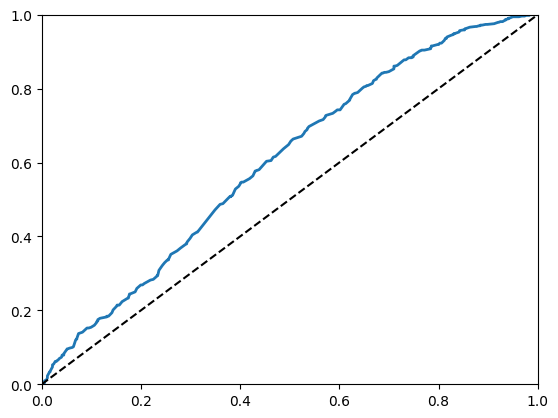

In [174]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba) #fpr = false positive rate, tpr = true positive rate
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

### Conclusion
The precision, recall, and F1 scores for this model suggest limited utility of this model for predicting whether the subject fleed prior to a fatal police shooting, based on their age, race, and gender. The model had a precision of approximately 0.52, indicating that when it predicted an individual was fleeing, it was correct about half the time--scarecely better than a 50/50 guess. The recall score was especially low at around 0.12, suggesting that the model missed a significant number of actual fleeing cases. The F1 score, which balances precision and recall, was also low, at approximately 0.20, reflecting the model's poor fit in this context.

## Problem 2: K Nearest Neighbors

### Reading the Data

Same as problem 1

### Splitting Data into Train/Test

Same as problem 1

### Building the Pipeline

In [175]:
#create a new pipeline.  Reuse same transformer as before.
knn_pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors=5)),
                     ])

In [176]:
# Define a parameter grid for KNN.  Trying different values for 'n_neighbors'
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

In [178]:
grid_search_knn = GridSearchCV(
    knn_pipeline,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    verbose=1
)

### Executing the Model

In [180]:
#Fit the grid search to training data
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy', verbose=1)

In [183]:
#Get the best parameters
best_params_knn = grid_search_knn.best_params_
print(f"Best parameters: {best_params_knn}")

#Get the best KNN model
best_knn = grid_search_knn.best_estimator_

Best parameters: {'knn__n_neighbors': 15}


In [186]:
#run my predict by passing in my X_test which is the testing data.  Makes all these predictions.
y_pred_knn = best_knn.predict(X_test)

### Evaluating Model

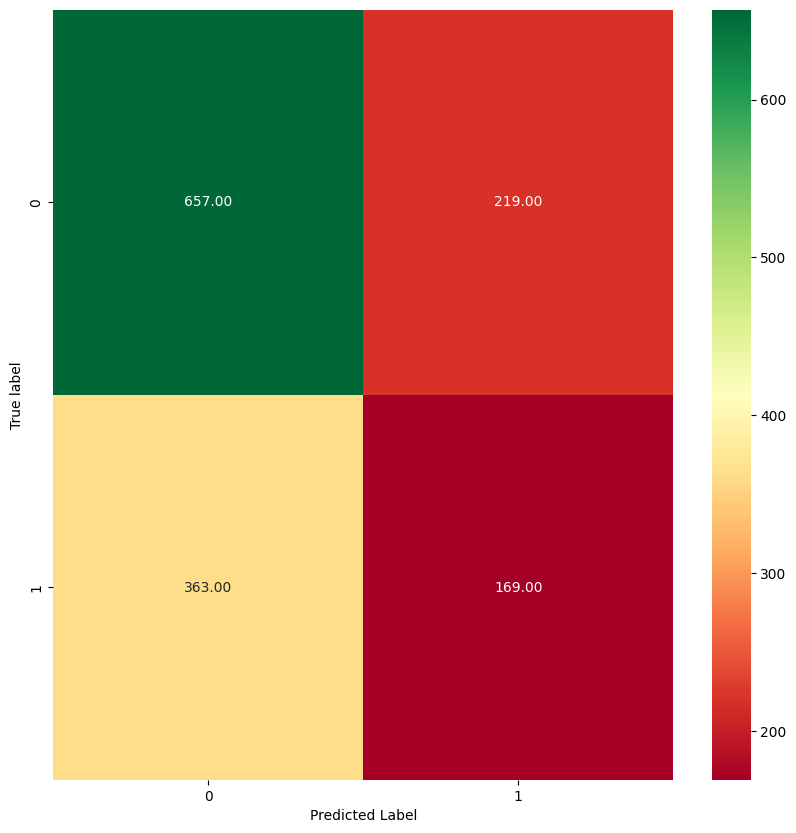

In [187]:
plot_cm(y_test, y_pred_knn)

In [188]:
print(precision_score(y_test,y_pred_knn))
print(recall_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))

0.43556701030927836
0.3176691729323308
0.367391304347826


0.5816381707693892


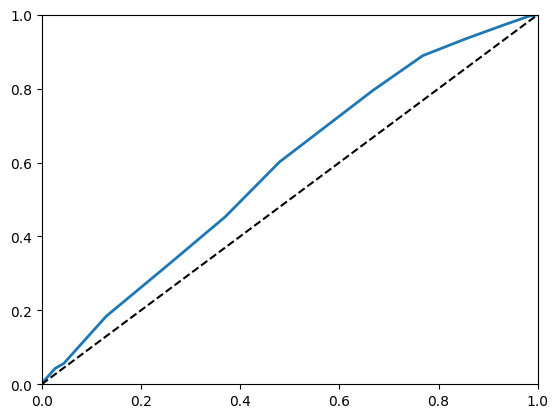

In [190]:
#get predicted probabilities and get my ROC curve for that.
y_pred_proba = best_knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

### Conclusion
For Problem 2, the K Nearest Neighbors model with the best parameter of 'knn__n_neighbors': 15 achieved fairly bad performance in predicting whether individuals fled prior to a fatal police shooting. The precision of approximately 0.44 indicates that when the model predicted fleeing, it was correct less than half the time. In other words, a 50/50 guess would likely have been more accurate.  The recall score of around 0.32 suggests that the model captured only a third of the actual fleeing cases. The F1 score, a harmonic mean of precision and recall, was approximately 0.37, suggests there is lots of room for improvement.